Install all the available language packs

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect

def detect_language(text):
  lang = detect(text)
  print(f"Detected Language:{lang}")
  return lang

Saving french.png to french (2).png

Processing french (2).png...
Attempt 1 of 3...
Preprocessed Image:


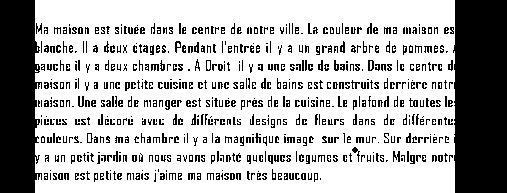


Extracted Text:
Ma maicon est située dans le centre de notre vill La couleur de ma maison es
anche. Il a deux tages. Pendant I'entrée il y a un grand arbre de pommes,
ache il yx deux chambres .A Oroit il ya une salle de bsins. Dans le centre d
isan il ya une petite cuisine et une salle de bains est construits derritre natr|
paisan. Une salle de manger est située prés dela cuisine. Le plafond de tautes I
ices ust décoré awe de différents designs de Fleurs dons de dilférente
couleurs. Gans ma chambre il y ala magnifique image sur le mur. Sur derri¢re
‘un petit jardin o nous avans plante quelques legumes et"ruits. Malgre notr
isan est petite mais jaime ma maison trés beaucoup.

   


Detected Language: fr


In [ ]:
import cv2
from PIL import Image
import pytesseract
from langdetect import detect
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from google.colab import files
import time  # For adding delays

# Set up Tesseract path (required in Colab)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def preprocess_image(image_path):
    """
    Preprocess the image for better OCR results.
    :param image_path: Path to the input image.
    :return: Thresholded image array.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found. Check the file path.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    return thresh

def detect_language(text):
    """
    Detect the language of the given text.
    :param text: The text extracted from the image.
    :return: Detected language.
    """
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"Error detecting language: {e}")
        return "Unknown"

def process_image_and_detect_language(image_path):
    """
    Preprocess the image, extract text, and detect language.
    :param image_path: Path to the input image.
    """
    retry_count = 0
    max_retries = 3  # Set the maximum number of retries

    while retry_count < max_retries:
        print(f"Attempt {retry_count + 1} of {max_retries}...")

        # Preprocess the image
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is None:
            return

        # Display preprocessed image
        print("Preprocessed Image:")
        cv2_imshow(preprocessed_image)

        # Extract text using OCR
        text = pytesseract.image_to_string(Image.fromarray(preprocessed_image))
        print("\nExtracted Text:")
        print(text)

        # Detect language
        language = detect_language(text)
        if language == "Unknown" or not text.strip():
            print("\nLanguage not detected. Retrying...")
            retry_count += 1
            time.sleep(2)  # Optional: Add a small delay before retrying
        else:
            print(f"\nDetected Language: {language}")
            break

    if retry_count == max_retries:
        print("\nFailed to detect language after maximum retries.")

# Upload an image and specify the path
uploaded = files.upload()

for file_name in uploaded.keys():
    print(f"\nProcessing {file_name}...")
    process_image_and_detect_language(file_name)
